In [2]:
import pandas as pd

kc_houses = pd.read_csv('/Users/flatironschool/Documents/dsc-v2-mod1-final-project-houston-ds-060319/kc_house_data.csv')

In [3]:
def Lin_Reg_Model(LinReg_Var,X_train, Y_train, X_test, Y_test):
    """
    Function for Checking for Linear Regression
    Plots a scatter plot of Predicted and Test Data
    Prints the explained Variance Score
    """
    mod = LinReg_Var.fit(X_train, Y_train)
    y_pred = mod.predict(X_test)
    plt.scatter(y_pred,Y_test)
    plt.show()
    print("explained variance score: ", explained_variance_score(Y_test,y_pred))

def Lin_Reg_Model_Log(LinReg_Var,X_train, Y_train, X_test, Y_test):
    
    mod = LinReg_Var.fit(X_train, np.log(Y_train))
    y_pred = mod.predict(X_test)
    plt.scatter(y_pred, np.log(Y_test))
    plt.show()
    print("explained variance score: ", explained_variance_score(Y_test,np.e**y_pred))

In [603]:
kc_houses.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [105]:
kc_houses['waterfront'].unique()

array([nan,  0.,  1.])

In [106]:
kc_houses['condition'].unique()

array([3, 5, 4, 1, 2])

In [107]:
kc_houses['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [108]:
kc_houses['view'].nunique()

5

In [109]:
kc_houses['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [48]:
kc_houses['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

Given that the vast majority of lots have a value of 0 for 'yr_renovated' and >10% of the values for 'yr_renovated' are missing, we will replace 'yr_renovated' with a dummy variable 'was_renovated'; all lots that have a year in which they were renovated will be represented with a 1, and all other lots will be represented with 0.

In [4]:
kc_houses['was_renovated']= kc_houses['yr_renovated'].fillna(0)
temp = kc_houses['was_renovated'].astype(bool).astype(int)
kc_houses['was_renovated'] = temp
kc_houses.drop(columns = ['yr_renovated'],inplace =True)

Roughly 10% of records have a null value for 'waterfront'. Given that a large number of records have a null value for waterfront but we think this information may have a bearing on sale price, it would not be practical to simply drop the rows for which waterfront has a null value. Instead, null values in the waterfront column will be replaced with 0.

In [5]:
kc_houses['waterfront'].fillna(0,inplace=True)

Given that only 63 rows are missing values for 'view', we will simply drop the rows that have a null value for 'view'

In [6]:
no_view = kc_houses['view'].isna()
kc_houses.drop(kc_houses[no_view].index,inplace=True)

In [337]:
kc_houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 0 to 21596
Data columns (total 21 columns):
id               21534 non-null int64
date             21534 non-null object
price            21534 non-null float64
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
was_renovated    21534 non-null int64
dtypes: float64(7), int64(12), object(2)
memory usage: 3.6+ MB


'sqft_basement' is a string for some reason? Let's convert that to float.

In [7]:
no_basement = kc_houses['sqft_basement']=='?'
kc_houses = kc_houses.drop(kc_houses[no_basement].index)

In [8]:
kc_houses['sqft_basement'] = kc_houses['sqft_basement'].apply(lambda x: float(x))

(array([2.8760e+03, 1.6331e+04, 1.5550e+03, 2.9600e+02, 1.3000e+01,
        9.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([ 1. ,  2.6,  4.2,  5.8,  7.4,  9. , 10.6, 12.2, 13.8, 15.4, 17. ,
        18.6, 20.2, 21.8, 23.4, 25. , 26.6, 28.2, 29.8, 31.4, 33. ]),
 <a list of 20 Patch objects>)

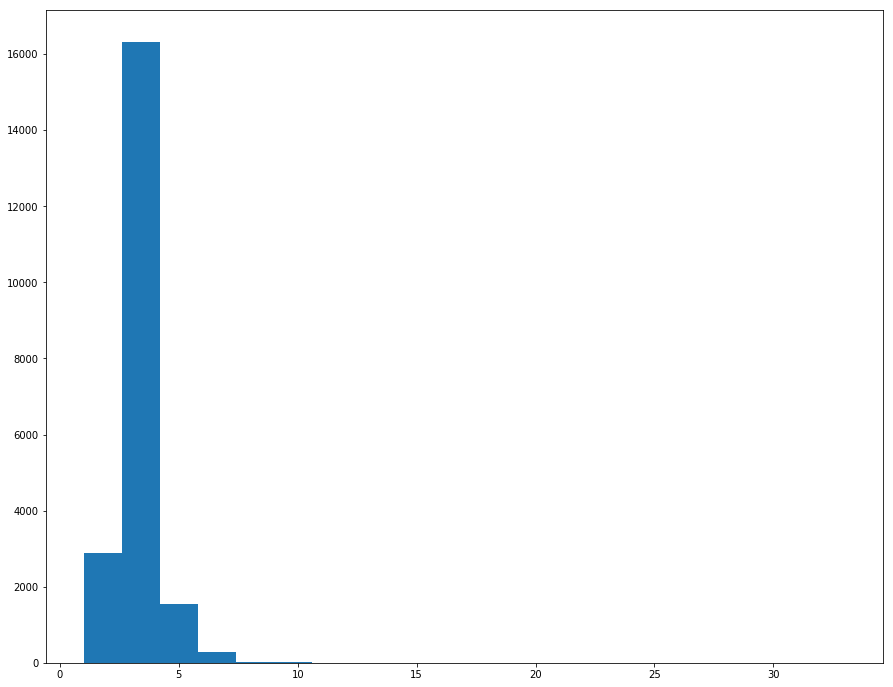

In [397]:
plt.figure(figsize = (15,12))
plt.hist(kc_houses['bedrooms'],bins = 20)

In [9]:
too_many_bedrooms = kc_houses[kc_houses['bedrooms']>15]
kc_houses.drop(too_many_bedrooms.index,inplace =True)
# kc_houses.drop(kc_houses[kc_houses['price']>5000000].index,inplace=True)

(array([1.910e+02, 2.685e+03, 9.607e+03, 6.724e+03, 1.551e+03, 2.580e+02,
        3.600e+01, 1.300e+01, 6.000e+00, 4.000e+00]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <a list of 10 Patch objects>)

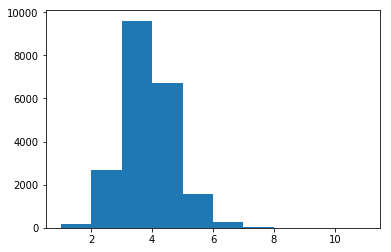

In [399]:
plt.hist(kc_houses['bedrooms'])

In [400]:
kc_houses.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated
count,2.107500e+04,2.107500e+04,21075.000000,21075.000000,21075.000000,2.107500e+04,21075.000000,21075.000000,21075.000000,21075.000000,21075.000000,21075.000000,21075.000000,21075.000000,21075.000000,21075.000000,21075.000000,21075.000000,21075.000000,21075.000000
mean,4.582379e+09,5.386081e+05,3.370439,2.114816,2078.260451,1.507278e+04,1.493476,0.006595,0.232598,3.409822,7.656418,1787.456133,290.804318,1971.022871,98077.869324,47.560342,-122.213830,1986.375469,12729.409300,0.034164
std,2.876137e+09,3.533868e+05,0.901713,0.765064,909.050223,4.117883e+04,0.539348,0.080946,0.763534,0.650569,1.171154,822.969610,440.662968,29.320477,53.530053,0.138582,0.140626,684.760203,27151.930947,0.181654
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,0.000000
25%,2.123375e+09,3.220000e+05,3.000000,1.750000,1426.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1195.000000,0.000000,1952.000000,98033.000000,47.471300,-122.328000,1490.000000,5100.000000,0.000000
50%,3.904961e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,47.572100,-122.230000,1840.000000,7625.000000,0.000000
75%,7.312150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068850e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,98117.000000,47.678200,-122.125000,2360.000000,10086.500000,0.000000
max,9.900000e+09,4.670000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,1.000000


In [439]:
kc_houses.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated,log_sqft_liv
id,1.000000,-0.020485,0.003059,0.004897,-0.013642,-0.132505,0.018924,-0.003988,0.012081,-0.023275,...,-0.012395,-0.004995,0.022245,-0.010761,-0.005112,0.021272,-0.003832,-0.138268,-0.009732,-0.001941
price,-0.020485,1.000000,0.317668,0.522672,0.696780,0.089735,0.261171,0.254580,0.397417,0.037336,...,0.600547,0.315833,0.056899,-0.052180,0.316727,0.024392,0.595837,0.084673,0.111884,0.619132
bedrooms,0.003059,0.317668,1.000000,0.526567,0.594095,0.033455,0.183913,-0.003570,0.080922,0.022691,...,0.491787,0.307120,0.162171,-0.156850,-0.011980,0.136263,0.402287,0.031760,0.017754,0.636746
bathrooms,0.004897,0.522672,0.526567,1.000000,0.752912,0.088198,0.504280,0.058648,0.183273,-0.128316,...,0.683104,0.277448,0.511021,-0.204022,0.024560,0.225972,0.568134,0.089127,0.045012,0.760490
sqft_living,-0.013642,0.696780,0.594095,0.752912,1.000000,0.173954,0.355129,0.096324,0.279411,-0.061518,...,0.875171,0.428470,0.322827,-0.199375,0.052443,0.244379,0.757759,0.185753,0.045383,0.957022
sqft_lot,-0.132505,0.089735,0.033455,0.088198,0.173954,1.000000,-0.007890,0.020628,0.072404,-0.009125,...,0.184057,0.015111,0.052443,-0.129541,-0.085154,0.230513,0.143649,0.719494,0.004203,0.149540
floors,0.018924,0.261171,0.183913,0.504280,0.355129,-0.007890,1.000000,0.018919,0.026731,-0.264202,...,0.525022,-0.247914,0.490130,-0.058258,0.049115,0.125438,0.278850,-0.011762,0.002275,0.367145
waterfront,-0.003988,0.254580,-0.003570,0.058648,0.096324,0.020628,0.018919,1.000000,0.379789,0.017152,...,0.064256,0.078705,-0.024475,0.030216,-0.012634,-0.036866,0.081548,0.029836,0.068580,0.074492
view,0.012081,0.397417,0.080922,0.183273,0.279411,0.072404,0.026731,0.379789,1.000000,0.045954,...,0.161646,0.274516,-0.054836,0.086257,0.005630,-0.076306,0.278871,0.072476,0.087422,0.243366
condition,-0.023275,0.037336,0.022691,-0.128316,-0.061518,-0.009125,-0.264202,0.017152,0.045954,1.000000,...,-0.159577,0.171116,-0.361725,0.002392,-0.016066,-0.105711,-0.093267,-0.004262,-0.055841,-0.051750


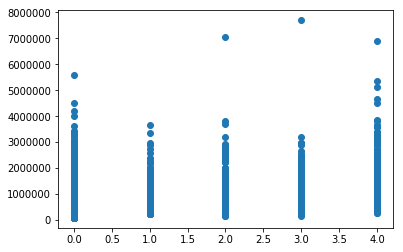

In [69]:
plt.scatter(kc_houses['view'],kc_houses['price'])

In [22]:
kc_houses['zipcode'].nunique()

70

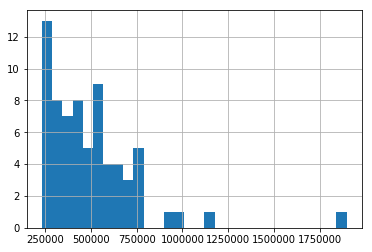

In [32]:
kc_houses.groupby('zipcode')['price'].median().hist(bins = 30)

In [ ]:
plt.hist(kc_houses['sqft_living15'])

In [10]:
import numpy as np
plt.hist(np.log(kc_houses['sqft_living15']))

NameError: name 'plt' is not defined

In [11]:
kc_houses['log_sqft_liv'] = np.log(kc_houses['sqft_living'])
target = kc_houses['price']
to_model = kc_houses['log_sqft_liv'].as_matrix().reshape(-1,1)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
to_model_train, to_model_test, target_train,target_test =train_test_split(to_model,target,test_size = 0.2)

In [16]:
from sklearn.linear_model import LinearRegression as LinReg
house_model = LinReg()
mod = house_model.fit(to_model_train,np.log(target_train))
test_pred = mod.predict(to_model_test)
plt.figure(figsize = (15,12))
plt.scatter(np.e**to_model_test,target_test, label = '')
plt.scatter(np.e**to_model_test,np.e**test_pred,c= 'red',label = '')
plt.xlabel('Living Area in sq. ft.')
plt.ylabel('Actual House Price')
plt.title('Simple Linear Regression Model Based on Natural Log of Living Area')

NameError: name 'plt' is not defined

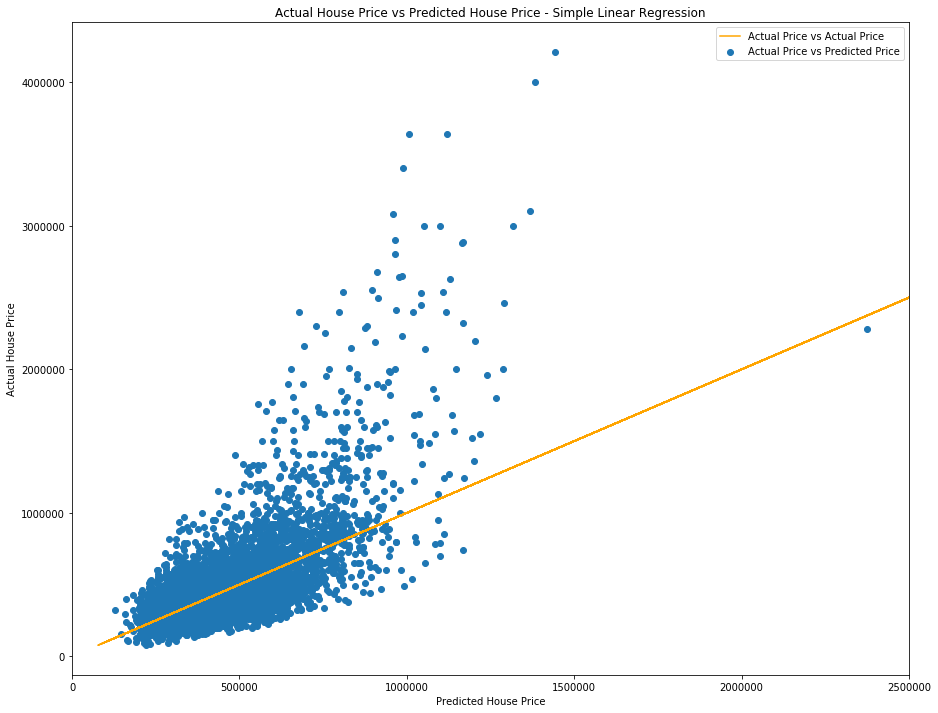

In [454]:
plt.figure(figsize = (15,12))
plt.scatter(np.e**test_pred,target_test, label = 'Actual Price vs Predicted Price')
plt.plot(target_test,target_test,color = 'orange', label = 'Actual Price vs Actual Price')
plt.xlim(0,2500000)
plt.xlabel('Predicted House Price')
plt.ylabel('Actual House Price')
plt.title('Actual House Price vs Predicted House Price - Simple Linear Regression')
plt.legend()
plt.savefig('simple_lin_reg')

In [17]:
from sklearn.metrics import explained_variance_score
from matplotlib import pyplot as plt
explained_variance_score(target_test,np.e**test_pred)

0.4458751109721002

In [18]:
zips = pd.get_dummies(kc_houses['zipcode'])

In [19]:
houses_with_zips = pd.concat([kc_houses,zips],axis =1)

In [20]:
houses_with_zips.drop(columns = ['zipcode'],inplace=True)

In [21]:
zip_plus_ln_sq_ft = pd.concat([zips,kc_houses['log_sqft_liv']],axis=1)

In [14]:
from sklearn.model_selection import train_test_split

In [22]:
minimal_train, minimal_test, target_train, target_test = train_test_split(zip_plus_ln_sq_ft,target, test_size = 0.2)

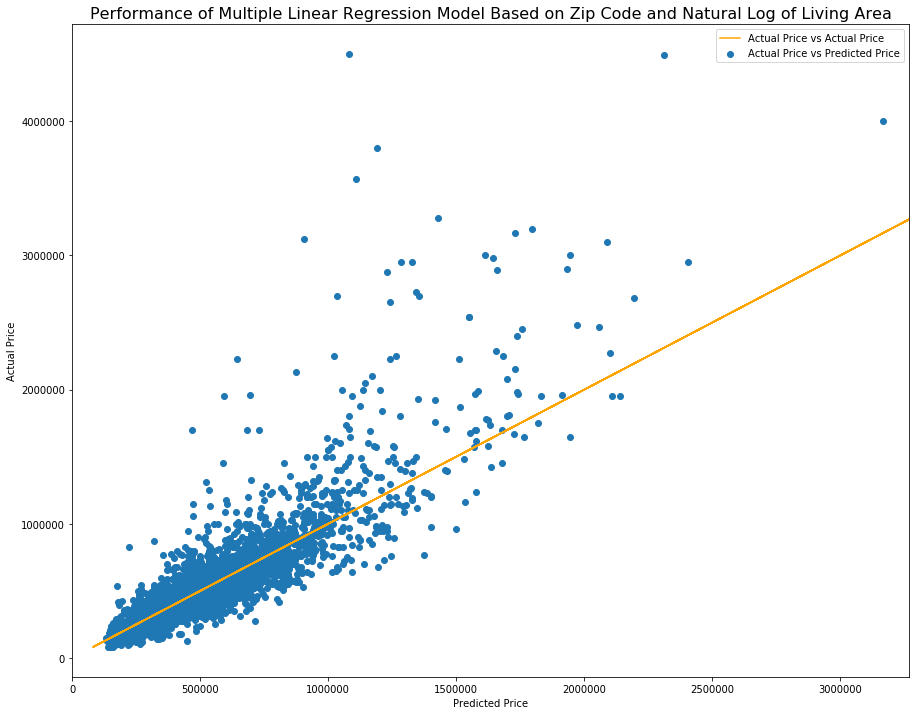

In [23]:
ml = house_model.fit(minimal_train,np.log(target_train))
y_pred = ml.predict(minimal_test)
plt.figure(figsize = (15,12))
plt.scatter(np.e**y_pred,target_test, label = 'Actual Price vs Predicted Price')
plt.plot(target_test,target_test,color = 'orange', label = 'Actual Price vs Actual Price')
plt.xlim(0,np.e**y_pred.max()+100000)
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Performance of Multiple Linear Regression Model Based on Zip Code and Natural Log of Living Area', fontsize = 16)
plt.legend()
plt.savefig('minimal_ml_model')

In [24]:
explained_variance_score(target_test,np.e**y_pred)#is this logic correct?

0.7317537019584541

In [25]:
slim_model = houses_with_zips.drop(columns = ['id','date','price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','condition','grade','sqft_above','sqft_basement','yr_built','long','sqft_living15','sqft_lot15'])

In [26]:
slim_train, slim_test, target_train, target_test = train_test_split(slim_model,target,test_size = 0.2)

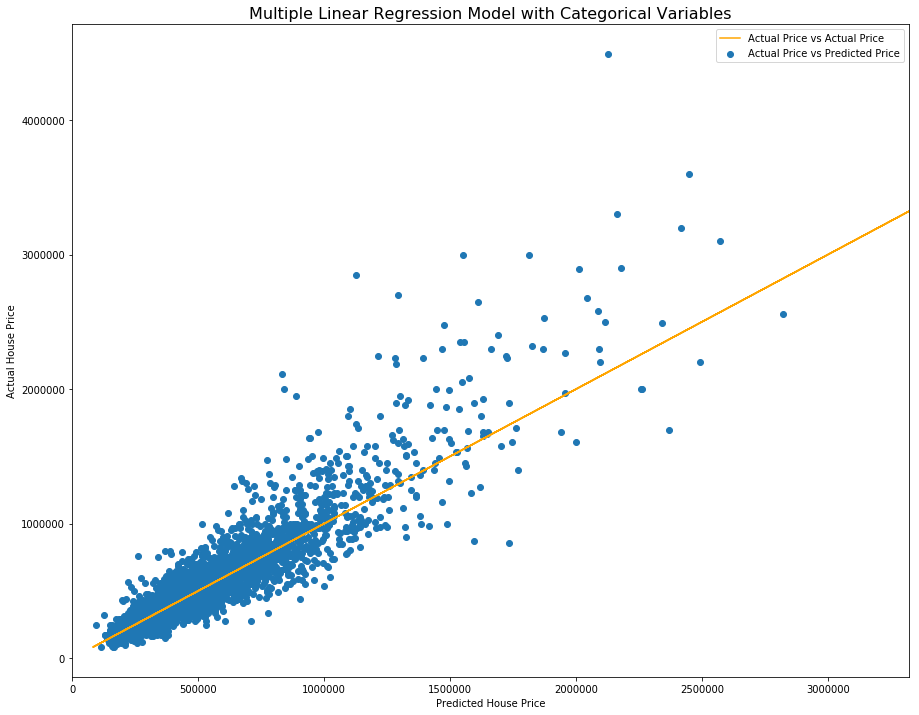

In [35]:
ml = house_model.fit(slim_train,np.log(target_train))
y_pred = ml.predict(slim_test)
plt.figure(figsize = (15,12))
plt.scatter(np.e**y_pred,target_test, label = 'Actual Price vs Predicted Price')
plt.plot(target_test,target_test,color='orange', label = 'Actual Price vs Actual Price')
plt.xlabel('Predicted House Price')
plt.xlim(0,np.e**y_pred.max()+500000)
plt.ylabel('Actual House Price')
plt.title('Multiple Linear Regression Model with Categorical Variables', fontsize = 16)
plt.legend()
plt.savefig('ml_reg_w_cat')
# plt.scatter(slim_train[''])

In [28]:
explained_variance_score(target_test,np.e**y_pred)#is this logic correct?

0.8187073341419018

In [540]:
ml.coef_

array([4.76929795e-01, 9.07431418e-02, 5.26831180e-01, 4.89255465e-02,
       6.81124259e-01, 1.68465098e+10, 1.68465098e+10, 1.68465098e+10,
       1.68465098e+10, 1.68465098e+10, 1.68465098e+10, 1.68465098e+10,
       1.68465098e+10, 1.68465098e+10, 1.68465098e+10, 1.68465098e+10,
       1.68465098e+10, 1.68465098e+10, 1.68465098e+10, 1.68465098e+10,
       1.68465098e+10, 1.68465098e+10, 1.68465098e+10, 1.68465098e+10,
       1.68465098e+10, 1.68465098e+10, 1.68465098e+10, 1.68465098e+10,
       1.68465098e+10, 1.68465098e+10, 1.68465098e+10, 1.68465098e+10,
       1.68465098e+10, 1.68465098e+10, 1.68465098e+10, 1.68465098e+10,
       1.68465098e+10, 1.68465098e+10, 1.68465098e+10, 1.68465098e+10,
       1.68465098e+10, 1.68465098e+10, 1.68465098e+10, 1.68465098e+10,
       1.68465098e+10, 1.68465098e+10, 1.68465098e+10, 1.68465098e+10,
       1.68465098e+10, 1.68465098e+10, 1.68465098e+10, 1.68465098e+10,
       1.68465098e+10, 1.68465098e+10, 1.68465098e+10, 1.68465098e+10,
      

In [29]:
residuals = np.e**y_pred-target_test

In [30]:
residuals.describe()

count    4.215000e+03
mean    -1.699491e+04
std      1.498067e+05
min     -2.361803e+06
25%     -5.513629e+04
50%     -1.411017e+03
75%      4.739192e+04
max      8.730124e+05
Name: price, dtype: float64

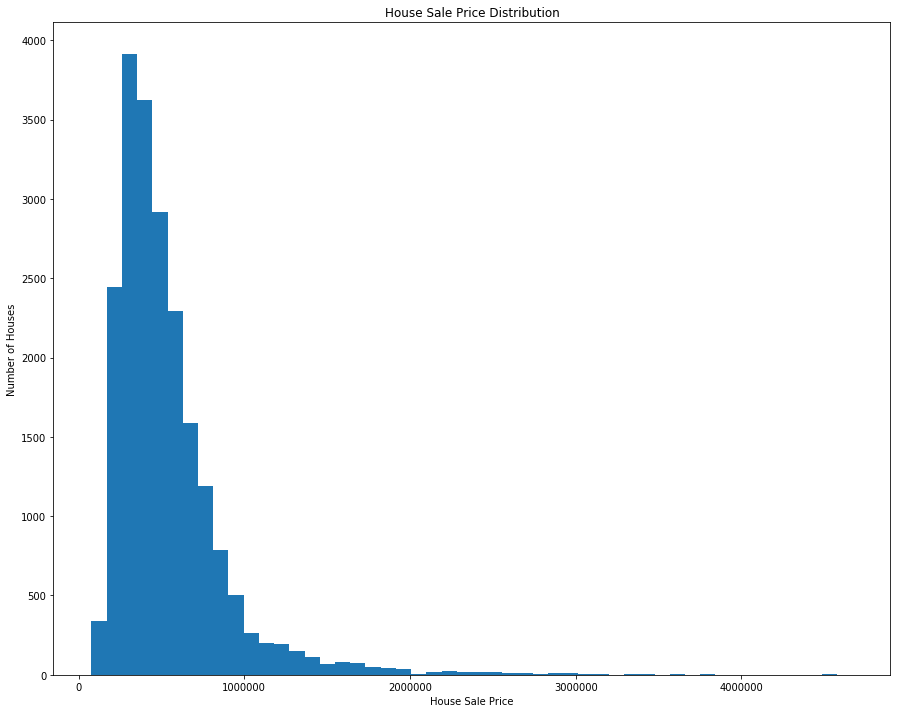

In [384]:
plt.figure(figsize = (15,12))
plt.hist(kc_houses['price'],bins = 50)
plt.xlabel('House Sale Price')
plt.ylabel('Number of Houses')
plt.title('House Sale Price Distribution')
plt.savefig('price_dist')

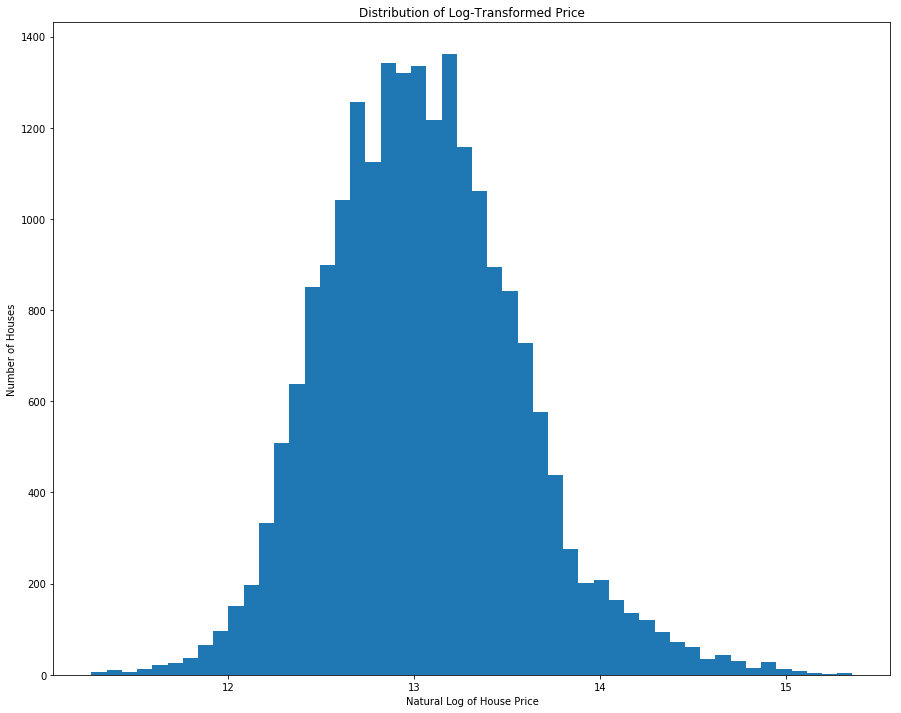

In [600]:
plt.figure(figsize = (15,12))
plt.hist(np.log(kc_houses['price']), bins =50)
plt.xlabel('Natural Log of House Price')
plt.ylabel('Number of Houses')
plt.title('Distribution of Log-Transformed Price')
plt.savefig('log_transformed_price')

In [544]:
kc_houses['price_per_sq_ft']= kc_houses['price']/kc_houses['sqft_living']

(array([3148., 6172., 5587., 3104., 1619.,  707.,  389.,  194.,  106.,
          49.]), array([ 87.58823529, 158.82941176, 230.07058824, 301.31176471,
        372.55294118, 443.79411765, 515.03529412, 586.27647059,
        657.51764706, 728.75882353, 800.        ]), <a list of 10 Patch objects>)

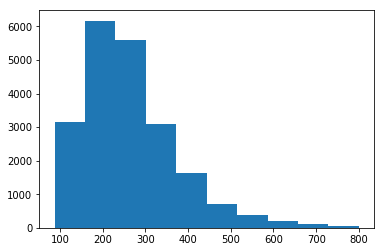

In [545]:
plt.hist(kc_houses['price_per_sq_ft'])

(array([ 283., 1096., 2771., 3660., 4373., 4215., 2699., 1233.,  557.,
         188.]),
 array([4.47264669, 4.69384319, 4.9150397 , 5.1362362 , 5.3574327 ,
        5.57862921, 5.79982571, 6.02102222, 6.24221872, 6.46341522,
        6.68461173]),
 <a list of 10 Patch objects>)

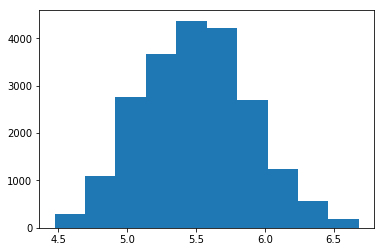

In [546]:
plt.hist(np.log(kc_houses['price_per_sq_ft']))

In [547]:
kc_houses['price_per_sq_ft'].describe()

count    21075.000000
mean       264.014152
std        109.878467
min         87.588235
25%        182.242991
50%        244.609060
75%        317.957093
max        800.000000
Name: price_per_sq_ft, dtype: float64

In [ ]:
kc_houses['price_per_sq_ft'].groupby()

In [164]:
everything = houses_with_zips.drop(columns = ['id','date','price','sqft_lot','sqft_lot15','sqft_living15','bathrooms'])
target = houses_with_zips['price']
everything_train, everything_test, target_train, target_test = train_test_split(everything,target,test_size=.2)

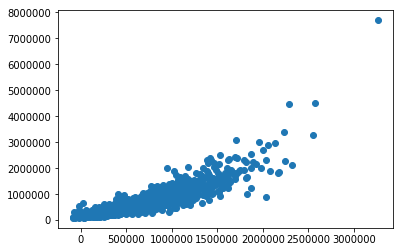

In [165]:
mod = house_model.fit(everything_train,target_train)
y_pred = mod.predict(everything_test)
plt.scatter(y_pred,target_test)

In [166]:
explained_variance_score(target_test,y_pred)

0.7869024501856363

(array([105.,  24.,  43.,  42.,  55.,  78., 138.,  81., 120.,  66.,  69.,
         49.,  48., 130.,  51., 110.,  81.,  94.,  68.,  85., 199., 142.,
        157., 100., 109., 109., 128.,  36.,  22.,  19.,  21.,  35.,  54.,
        137., 141., 143., 211., 162., 138.,  91., 364., 223., 179., 227.,
        207., 203., 494., 256., 186., 187., 209., 315., 237., 505., 234.,
        156., 173., 232., 330., 358., 381.,  97., 136., 138., 153., 177.,
        626., 371., 329., 222., 187.,  94., 196., 419., 205., 269., 236.,
        253., 285., 198., 372., 239., 144., 166., 159., 212., 410., 256.,
        195., 386., 389., 399., 387., 671., 214., 135., 121., 156., 172.,
        507.]),
 array([1900.  , 1901.15, 1902.3 , 1903.45, 1904.6 , 1905.75, 1906.9 ,
        1908.05, 1909.2 , 1910.35, 1911.5 , 1912.65, 1913.8 , 1914.95,
        1916.1 , 1917.25, 1918.4 , 1919.55, 1920.7 , 1921.85, 1923.  ,
        1924.15, 1925.3 , 1926.45, 1927.6 , 1928.75, 1929.9 , 1931.05,
        1932.2 , 1933.35, 1934.5 ,

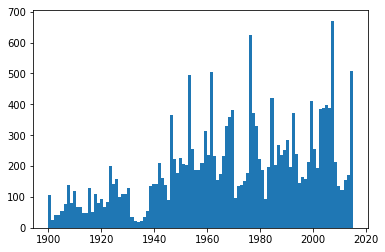

In [169]:
plt.hist(kc_houses['yr_built'], bins =100)

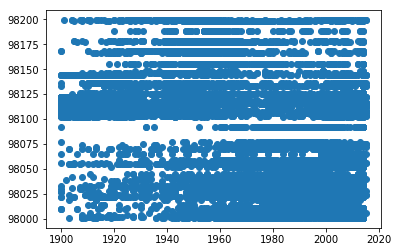

In [181]:
plt.scatter(kc_houses['yr_built'],kc_houses['zipcode'])

In [182]:
kc_houses['yr_built'].nunique()

116

In [183]:
kc_houses.groupby(['zipcode','yr_built'])['price'].median()

zipcode  yr_built
98001    1903         230000.0
         1908         213750.0
         1909         185900.0
         1912         170000.0
         1913         168000.0
         1919         189950.0
         1936         292500.0
         1938         389000.0
         1939         249900.0
         1942         239950.0
         1943         311000.0
         1944         199900.0
         1946         207725.0
         1947         225000.0
         1948         366250.0
         1950         243450.0
         1952         231500.0
         1953         209550.0
         1954         228725.0
         1955         314564.5
         1956         100000.0
         1958         210500.0
         1959         341500.0
         1960         246700.0
         1961         294000.0
         1962         223500.0
         1963         217500.0
         1964         235000.0
         1965         274000.0
         1966         215000.0
                       ...    
98199    1968        

In [209]:
year_built = pd.get_dummies(houses_with_zips['yr_built'])
houses_with_zips_and_years = pd.concat([houses_with_zips,year_built],axis=1)
houses_with_zips_and_years.drop(columns = ['yr_built'],inplace=True)

In [210]:
everything = houses_with_zips_and_years.drop(columns = ['id','date','price','sqft_lot','sqft_lot15','sqft_living15','bathrooms'])
target = houses_with_zips['price']
everything_train, everything_test, target_train, target_test = train_test_split(everything,target,test_size=.2)

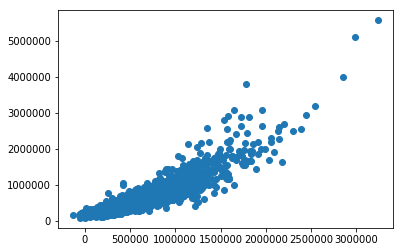

In [211]:
mod = house_model.fit(everything_train,target_train)
y_pred = mod.predict(everything_test)
plt.scatter(y_pred,target_test)

In [212]:
explained_variance_score(target_test,y_pred)

0.8171939789098877

In [ ]:
#grouping by year built does not improve model

In [214]:
houses_with_zips['date'] = pd.to_datetime(houses_with_zips['date'])

In [517]:
from sklearn import preprocessing as pp
scaler = pp.MinMaxScaler()
features = kc_houses[['view','lat','log_sqft_liv']]
target = np.log(kc_houses['price'])
to_scale = pd.concat([features,target],axis =1)
scaled_features = scaler.fit_transform(to_scale)

In [518]:
scaled_df = pd.DataFrame(scaled_features, columns = ['view','lat','log_sqft_liv','ln_price'])

In [519]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21075 entries, 0 to 21074
Data columns (total 4 columns):
view            21075 non-null float64
lat             21075 non-null float64
log_sqft_liv    21075 non-null float64
ln_price        21075 non-null float64
dtypes: float64(4)
memory usage: 658.7 KB


In [531]:
to_mod = pd.concat([scaled_df,zips],axis =1)

In [532]:
features_train, features_test, target_train, target_test = train_test_split(to_mod.drop(columns = ['ln_price']),to_mod['ln_price'],test_size = 0.2)

In [533]:
Lin_Reg_Model(house_model,features_train, target_train, features_test, target_test)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [548]:
per_sq_ft = pd.concat([kc_houses,zips],axis =1)

In [549]:
per_sq_ft.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199
count,2.107500e+04,2.107500e+04,21075.000000,21075.000000,21075.000000,2.107500e+04,21075.000000,21075.000000,21075.000000,21075.000000,...,21075.000000,21075.00000,21075.000000,21075.000000,21075.000000,21075.000000,21075.000000,21075.000000,21075.000000,21075.000000
mean,4.582379e+09,5.386081e+05,3.370439,2.114816,2078.260451,1.507278e+04,1.493476,0.006595,0.232598,3.409822,...,0.013191,0.00261,0.020641,0.011767,0.012384,0.011910,0.012242,0.006216,0.012811,0.014852
std,2.876137e+09,3.533868e+05,0.901713,0.765064,909.050223,4.117883e+04,0.539348,0.080946,0.763534,0.650569,...,0.114095,0.05102,0.142181,0.107841,0.110596,0.108483,0.109967,0.078597,0.112463,0.120962
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.123375e+09,3.220000e+05,3.000000,1.750000,1426.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.904961e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.312150e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068850e+04,2.000000,0.000000,0.000000,4.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.900000e+09,4.670000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


(array([3140., 6151., 5568., 3121., 1640.,  709.,  394.,  197.,  105.,
          49.]), array([ 87.58823529, 158.64161834, 229.69500138, 300.74838442,
        371.80176747, 442.85515051, 513.90853355, 584.9619166 ,
        656.01529964, 727.06868268, 798.12206573]), <a list of 10 Patch objects>)

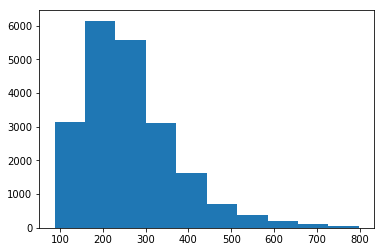

In [582]:
plt.hist(per_sq_ft['price_per_sq_ft'])

In [568]:
per_sq_ft['log_price_per'] = np.log(per_sq_ft['price_per_sq_ft'])

In [581]:
per_sq_ft = per_sq_ft.drop(per_sq_ft[per_sq_ft['price_per_sq_ft']>=800].index)

In [583]:
purse = LinReg()
mod = purse.fit(per_sq_ft.drop(columns = ['id','date','price','price_per_sq_ft','sqft_living','sqft_lot','bedrooms','bathrooms','condition','grade','long','sqft_living15','sqft_lot15','log_price_per']),per_sq_ft['log_price_per'])

In [587]:
per_sq_ft['y_pred'] = mod.predict(per_sq_ft.drop(columns = ['id','date','price','price_per_sq_ft','sqft_living','sqft_lot','bedrooms','bathrooms','condition','grade','long','sqft_living15','sqft_lot15','log_price_per']))

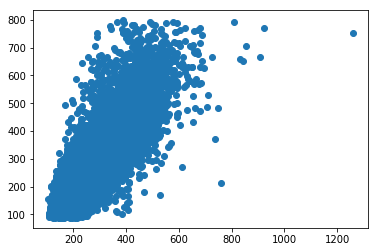

In [585]:
plt.scatter(np.e**y_pred,np.e**per_sq_ft['log_price_per'])

In [586]:
explained_variance_score(per_sq_ft['log_price_per'],y_pred)

0.747244825191274

In [ ]:
plt.scatter(per_sq_ft[''],per_sq_ft[''])

In [590]:
per_sq_ft[np.e**per_sq_ft['y_pred']>1200]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,98155,98166,98168,98177,98178,98188,98198,98199,log_price_per,y_pred
15241,2425049063,9/11/2014,3640000.0,4,3.25,4830,22257,2.0,1.0,4.0,...,0,0,0,0,0,0,0,0,6.624892,7.137924


In [594]:
richie_rich = per_sq_ft.loc[per_sq_ft[98039]==1]

In [596]:
richie_rich['price'].mean()

1961382.9787234042

In [597]:
richie_rich['price'].median()

1880000.0

In [598]:
richie_rich['price'].describe()

count    4.700000e+01
mean     1.961383e+06
std      7.978098e+05
min      7.875000e+05
25%      1.375000e+06
50%      1.880000e+06
75%      2.455000e+06
max      4.000000e+06
Name: price, dtype: float64